In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, glob
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [143]:
with open('trainset_python/python/class_names.txt') as f:
    classes = f.readlines()

for i,c in enumerate(classes):
    classes[i] = c.strip()
    
classes

['0: other',
 '1: comcuc',
 '2: cowpig1',
 '3: eucdov',
 '4: eueowl1',
 '5: grswoo',
 '6: tawowl1']

In [151]:
with open('trainset_python/python/feature_names.txt') as f:
    features = f.readlines()

for i,feature in enumerate(features):
    features[i] = feature.strip()
    
len(features)

548

In [100]:
rootdir = os. getcwd()
files = []
files_stand = []
labels = []
data = []
data_stand = []
    
for i,f in enumerate(glob.glob(rootdir + '/**/*.npy', recursive=True)):
    if (i % 2) == 0:
        label = pd.DataFrame(np.load(f))
        #lable = lable.rename(columns={lable.columns[0]: "overall_class"})
        for i, col in enumerate(label.columns):
            if i == 0:
                label = label.rename(columns={label.columns[0]: "overall_class_vote"})
            else:
                label = label.rename(columns={col: "class_vote_" + str(i)})
        labels.append(label)
    else:
        file = pd.DataFrame(np.load(f), columns = features)
        file_stand = pd.DataFrame(StandardScaler().fit_transform(np.load(f)), columns = features)
        files.append(file)
        files_stand.append(file_stand)
        data.append(pd.concat([file], axis=1, join="inner"))
        data_stand.append(pd.concat([file_stand], axis=1, join="inner"))
print(np.array(data_stand).shape)

(1200, 100, 548)


In [185]:
_dict = dict()
for idx in range(0, len(data_stand)):
    train_features = data_stand.copy()[idx].to_numpy()

    model = PCA().fit(train_features)
    X_pc = model.transform(train_features)

    # number of components
    n_pcs= model.components_.shape[0]
    #print(n_pcs)

    most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
    print(len(most_important))
    already_gotten = set()
    most_important = []
    
    for i in range(n_pcs):
        if i not in already_gotten:
            most_important.append(np.abs(model.components_[i]).argmax)
            already_gotten.add(i)
            
    print(most_important)
    most_important_names = [features[most_important[i]] for i in range(n_pcs)]
    
    for i, (feature_name, var_ratio) in enumerate(zip(most_important_names, model.explained_variance_ratio_)):
        #if feature_name not in already_gotten:
        if feature_name not in _dict:
            _dict[feature_name] = [1, var_ratio]
                #already_gotten.add(feature_name)
        else:
            _dict[feature_name] = [_dict[feature_name][0] + 1, _dict[feature_name][1] + var_ratio]
                #already_gotten.add(feature_name)
_dict = list(_dict.items())
_dict.sort(key=lambda l: l[1][0], reverse=True)

100
[<built-in method argmax of numpy.ndarray object at 0x0000016EC3087450>, <built-in method argmax of numpy.ndarray object at 0x0000016EC3087630>, <built-in method argmax of numpy.ndarray object at 0x0000016EC3087690>, <built-in method argmax of numpy.ndarray object at 0x0000016EC30874B0>, <built-in method argmax of numpy.ndarray object at 0x0000016EC3087A50>, <built-in method argmax of numpy.ndarray object at 0x0000016EC30875D0>, <built-in method argmax of numpy.ndarray object at 0x0000016EC3087330>, <built-in method argmax of numpy.ndarray object at 0x0000016EC30872D0>, <built-in method argmax of numpy.ndarray object at 0x0000016EC3087390>, <built-in method argmax of numpy.ndarray object at 0x0000016EC3087510>, <built-in method argmax of numpy.ndarray object at 0x0000016EC30873F0>, <built-in method argmax of numpy.ndarray object at 0x0000016EC38C0150>, <built-in method argmax of numpy.ndarray object at 0x0000016EC38C0210>, <built-in method argmax of numpy.ndarray object at 0x000001

TypeError: list indices must be integers or slices, not builtin_function_or_method

In [176]:
_copy_dict = _dict.copy()
#for i, _tuple in enumerate(_copy_dict):
 #   _copy_dict[i][1][1] /= 1200

print(pd.DataFrame.from_dict(_copy_dict))

print(np.sum([j[1][1] for j in _copy_dict]))

                        0                 1
0     raw_contrast_mean_0   [853, 3.572957]
1      raw_contrast_std_1  [852, 4.2919445]
2      cln_contrast_std_1   [844, 4.295087]
3     cln_contrast_mean_1  [827, 3.9887435]
4     cln_contrast_mean_0  [792, 3.7293086]
..                    ...               ...
543  cln_melspect_mean_42   [26, 1.6130806]
544  raw_melspect_mean_41   [26, 1.3868469]
545  cln_melspect_mean_37   [24, 0.4074934]
546        cln_power_mean   [24, 2.2695243]
547        raw_mfcc_std_1   [18, 1.4961171]

[548 rows x 2 columns]
1148.9497


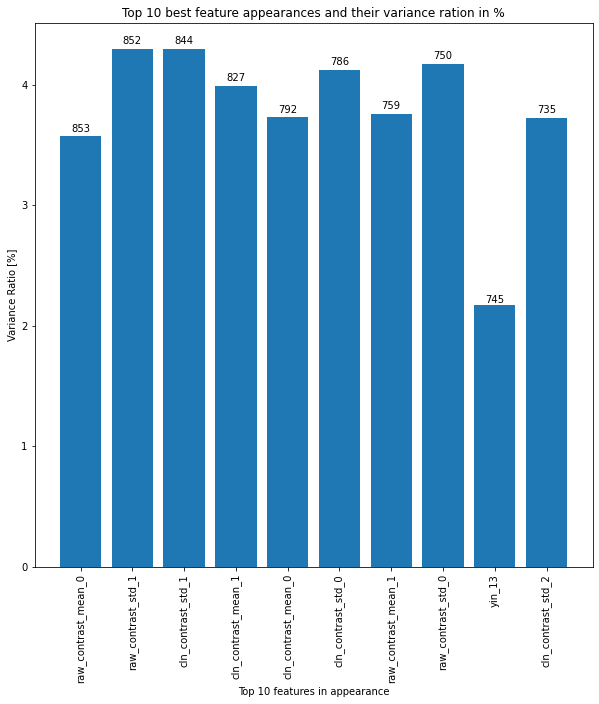

In [177]:
l = _copy_dict[:10]
#l += _dict[-10:]

_f = [feature[0] for feature in l]
_y = [j[1][1] for j in l]
_nr = [j[1][0] for j in l]

fig = plt.figure(figsize=(10, 10))
bar = plt.bar(_f, _y)
plt.xticks(rotation=90)
plt.title('Top 10 best feature appearances and their variance ration in %')
plt.xlabel('Top 10 features in appearance')
plt.ylabel('Variance Ratio [%]')

for i, rect in enumerate(bar):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+(height*0.01), f'{_nr[i]}', ha='center')

plt.show()

In [178]:
print(np.sum([j[1][1] for j in _copy_dict[:10]]))

37.81743


In [189]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

_dict = {feature: 0 for feature in features}

train_features = files_stand[10]

model = PCA().fit(train_features)
X_pc = model.transform(train_features)

n_pcs= model.components_.shape[0]

most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

print(model.components_.shape)

#print(len(most_important))
#print(len(set(most_important)))
#print(most_important)

# get the feature names + corresponding variance ratio
most_important_names = [[features[most_important[i]], model.explained_variance_ratio_[i]] for i in range(n_pcs)]



#print(sum(pair[1] for pair in most_important_names))

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

for pair in dic.items():
    _dict[str(pair[1][0])] = _dict[str(pair[1][0])] + 1 

# build the dataframe
print(pd.DataFrame(sorted(dic.items())))

#for pair in _dict.items():
    #print(pair)

(100, 548)
        0                                     1
0     PC1    [cln_melspect_mean_59, 0.32878497]
1    PC10        [cln_mfcc_d_std_4, 0.01894162]
2   PC100                [yin_8, 1.6991596e-14]
3    PC11    [raw_melspect_std_23, 0.015973875]
4    PC12    [raw_melspect_std_37, 0.014958911]
..    ...                                   ...
95   PC95               [yin_12, 0.00040629663]
96   PC96  [cln_mfcc_d2_mean_14, 0.00036518823]
97   PC97                [yin_2, 0.00032081967]
98   PC98      [cln_mfcc_d_std_11, 0.000309958]
99   PC99                 [yin_5, 0.0002913077]

[100 rows x 2 columns]


In [103]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]


<class 'numpy.ndarray'>


<AxesSubplot:>

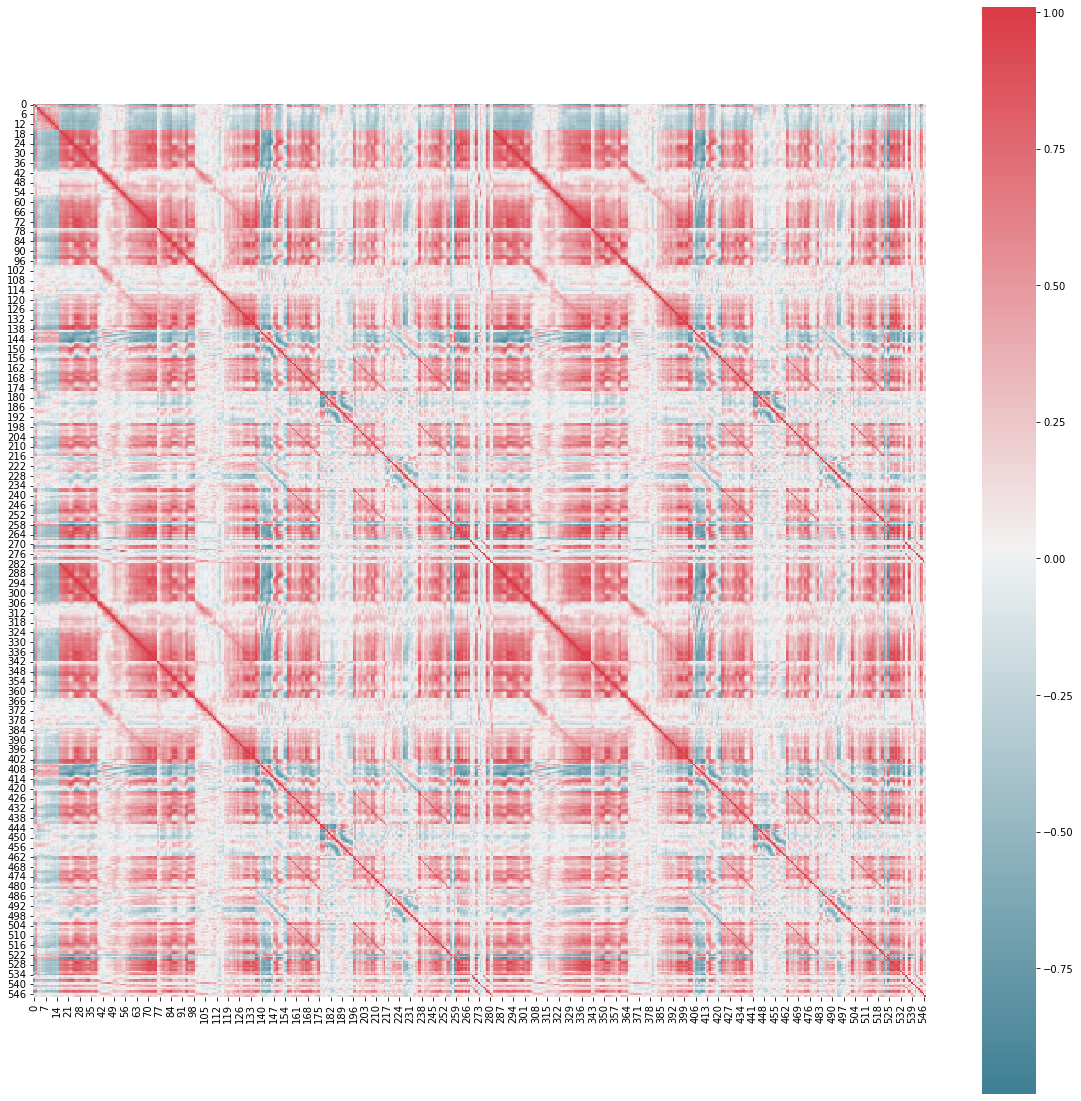

In [122]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns

file = np.transpose(files_stand.copy()[10].to_numpy())
print(type(file))

f, ax = plt.subplots(figsize=(20, 20))
corr = np.cov(file)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, glob
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [4]:
with open('trainset_python/python/class_names.txt') as f:
    classes = f.readlines()

for i,c in enumerate(classes):
    classes[i] = c.strip()

classes

['0: other',
 '1: comcuc',
 '2: cowpig1',
 '3: eucdov',
 '4: eueowl1',
 '5: grswoo',
 '6: tawowl1']

In [6]:
with open('trainset_python/python/feature_names.txt') as f:
    features = f.readlines()

for i,feature in enumerate(features):
    features[i] = feature.strip()
    
#features

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#all files in one dataframe
idx = pd.Series([i for i in range(100)])

rootdir = os. getcwd()
files = pd.DataFrame([])
files_stand = pd.DataFrame([])
lables = pd.DataFrame([])
data = pd.DataFrame([])
data_stand = pd.DataFrame([])
    
for i,f in enumerate(glob.glob(rootdir + '/**/*.npy', recursive=True)):
    if (i % 2) == 0:
        lable = pd.DataFrame(np.load(f))
        #lable = lable.rename(columns={lable.columns[0]: "overall_class"})
        for i, col in enumerate(lable.columns):
            if i == 0:
                lable = lable.rename(columns={lable.columns[0]: "overall_class_vote"})
            else:
                lable = lable.rename(columns={col: "class_vote_" + str(i)})
        if lables.empty:
            lables = lable
        else:
            idx = idx + (i*100)
            lable.index = idx
            lables = lables.append(lable) #25
    else:
        file = pd.DataFrame(np.load(f), columns = features)
        file_stand = pd.DataFrame(StandardScaler().fit_transform(np.load(f)), columns = features)
        if files.empty:
            files = file
        else:
            idx = idx + (i*100)
            file.index = idx
            files = files.append(file) #34
        if files_stand.empty:
            files_stand = file_stand
        else:
            idx = idx + (i*100)
            file_stand.index = idx
            files_stand = files_stand.append(file_stand)


lables.index = pd.Series([i for i in range(len(lables))])
files.index = pd.Series([i for i in range(len(lables))])
files_stand.index = pd.Series([i for i in range(len(lables))])

In [10]:
print(lables.shape)
print(files.shape)
print(type(files))
files

(120000, 8)
(120000, 548)
<class 'pandas.core.frame.DataFrame'>


,zcr_mean,zcr_std,yin_0,yin_1,yin_2,yin_3,yin_4,yin_5,yin_6,yin_7,...,cln_contrast_mean_4,cln_contrast_mean_5,cln_contrast_mean_6,cln_contrast_std_0,cln_contrast_std_1,cln_contrast_std_2,cln_contrast_std_3,cln_contrast_std_4,cln_contrast_std_5,cln_contrast_std_6
0,0.166783,0.079440,490.957062,491.752991,488.983582,485.077576,469.738678,513.687073,512.657349,245.042892,...,13.432678,13.885087,17.060001,6.169077,3.001384,3.211213,4.549636,3.261581,3.175519,1.371739
1,0.241420,0.026630,467.413574,516.481689,515.562134,514.210266,509.392456,510.750336,511.419983,511.064209,...,11.027208,14.805115,17.158812,4.463205,3.956305,1.962520,2.206298,2.378360,1.921748,2.072176
2,0.264509,0.023550,511.845062,508.178223,509.490753,509.445099,513.549133,512.355530,514.466064,515.264587,...,12.740061,13.215790,16.725847,1.774137,3.766160,2.463165,1.830873,3.058117,1.740199,1.977649
3,0.295410,0.016382,514.254700,512.569824,4576.394043,4567.560547,4576.487793,4655.340332,4689.938477,4697.403809,...,11.951676,13.193249,16.734816,3.230220,3.042296,3.633888,2.285815,2.923266,1.529872,1.633861
4,0.292899,0.026179,462.359528,4722.730469,4718.769043,4696.359375,4698.638672,4731.375488,4714.809570,4737.364258,...,10.747338,12.740884,16.750946,3.083272,2.659685,3.981223,3.348599,2.550901,1.909587,1.636644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,0.095703,0.013231,123.890106,102.581856,138.742645,105.556229,134.435104,125.141899,101.367195,101.144600,...,11.881072,11.997240,13.956856,4.311897,1.704396,3.486321,2.590645,2.213166,1.967152,1.149496
119996,0.080706,0.007739,113.352158,132.759506,131.748795,132.741898,137.459015,141.979767,120.620422,121.376541,...,12.572021,12.853501,13.934392,3.585637,2.613748,2.251281,3.677099,2.756432,1.326595,1.160036
119997,0.093890,0.009152,112.554787,111.380638,110.192711,139.752274,108.300552,108.921104,109.548843,150.185089,...,12.744102,12.085483,14.217721,2.930846,3.418031,3.615596,3.143349,3.012995,1.170673,0.853872
119998,0.086844,0.008885,239.434128,238.842987,247.399475,146.594330,173.950851,147.529724,147.219482,144.575821,...,11.219385,13.034064,14.253229,2.985406,2.403266,2.538163,2.965117,1.789058,1.545262,1.312161


In [23]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)


import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['label'] = iris.target

# Specify the number of top features to select
num_top_features = 2

# Loop through each class/label
for i in set(df['label']):
    # Select the rows corresponding to the current label
    label_df = df[df['label'] == i]
    
    # Separate the features and labels
    X = label_df.drop('label', axis=1)
    y = label_df['label']
    
    # Use SelectKBest to select the top features for the current label
    selector = SelectKBest(f_classif, k=num_top_features)
    selector.fit(X, y)
    
    # Print the top features for the current label
    print(f"Top {num_top_features} features for label {i}:")
    for feature_idx in selector.get_support(indices=True):
        print(f"- {iris.feature_names[feature_idx]}")


Top 2 features for label 0:
- petal length (cm)
- petal width (cm)
Top 2 features for label 1:
- petal length (cm)
- petal width (cm)
Top 2 features for label 2:
- petal length (cm)
- petal width (cm)


In [152]:
rootdir = os. getcwd()
files = []
files_stand = []
labels = []
data = []
data_stand = []
data_stand_with_label = []
    
for i,f in enumerate(glob.glob(rootdir + '/**/*.npy', recursive=True)):
    if (i % 2) == 0:
        label = pd.DataFrame(np.load(f))
        #lable = lable.rename(columns={lable.columns[0]: "overall_class"})
        for i, col in enumerate(lable.columns):
            if i == 0:
                label = lable.rename(columns={lable.columns[0]: "overall_class_vote"})
            else:
                label = lable.rename(columns={col: "class_vote_" + str(i)})
        labels.append(lable)
    else:
        file = pd.DataFrame(np.load(f), columns = features)
        file_stand = pd.DataFrame(StandardScaler().fit_transform(np.load(f)), columns = features)
        files.append(file)
        files_stand.append(file_stand)
        data.append(pd.concat([file, label], axis=1, join="inner"))
        data_stand.append(pd.concat([file_stand], axis=1, join="inner"))
        data_stand_with_label.append(pd.concat([file_stand, label], axis=1, join="inner"))

In [153]:
data_stand_incl_label = data_stand.copy()
other = 0
other_ind = []
comcuc = 0
comcuc_ind = []
cowpig1 = 0
cowpig1_ind = []
eucdov = 0
eucdov_ind = []
eueowl1 = 0
eueowl1_ind = []
grswoo = 0
grswoo_ind = []
tawowl1 = 0
tawowl1_ind = []

for i,d in enumerate(data):
    #print(d)
    #break
    if 1 in set(d['overall_class_vote']):
        comcuc += 1
        comcuc_ind.append(i)
    elif 2 in set(d['overall_class_vote']):
        cowpig1 += 1
        cowpig1_ind.append(i)
    elif 3 in set(d['overall_class_vote']):
        eucdov += 1
        eucdov_ind.append(i)
    elif 4 in set(d['overall_class_vote']):
        eueowl1 += 1
        eueowl1_ind.append(i)
    elif 5 in set(d['overall_class_vote']):
        grswoo += 1
        grswoo_ind.append(i)
    elif 6 in set(d['overall_class_vote']):
        tawowl1 += 1
        tawowl1_ind.append(i)
    else: 
        other += 1
        other_ind.append(i)

print('other', other, other_ind)
print('comcuc', comcuc, comcuc_ind)
print('cowpig1', cowpig1, cowpig1_ind)
print('eucdov', eucdov, eucdov_ind)
print('eueowl1', eueowl1, eueowl1_ind)
print('grswoo', grswoo, grswoo_ind)
print('tawowl1', tawowl1, tawowl1_ind)

other 30 [52, 123, 138, 179, 228, 233, 243, 253, 297, 317, 331, 332, 347, 377, 464, 465, 539, 564, 569, 691, 711, 713, 731, 765, 837, 940, 942, 1156, 1167, 1188]
comcuc 196 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 

In [154]:
rootdir = os. getcwd()
files = []
files_stand = []
lables = []
data = []
data_stand = []
    
for i,f in enumerate(glob.glob(rootdir + '/**/*.npy', recursive=True)):
    if (i % 2) == 0:
        lable = pd.DataFrame(np.load(f))
        #lable = lable.rename(columns={lable.columns[0]: "overall_class"})
        for i, col in enumerate(lable.columns):
            if i == 0:
                lable = lable.rename(columns={lable.columns[0]: "overall_class_vote"})
            else:
                lable = lable.rename(columns={col: "class_vote_" + str(i)})
        lables.append(lable)
    else:
        file = pd.DataFrame(np.load(f), columns = features)
        file_stand = pd.DataFrame(StandardScaler().fit_transform(np.load(f)), columns = features)
        files.append(file)
        files_stand.append(file_stand)
        data.append(pd.concat([file], axis=1, join="inner"))
        data_stand.append(pd.concat([file_stand], axis=1, join="inner"))

In [174]:
df_data_comcuc = pd.DataFrame([row for idx in comcuc_ind for curr_data in [data_stand[idx].to_numpy()] for row in curr_data], columns=features)

In [175]:
print(df_data_comcuc.shape)

(19600, 548)


In [189]:
df_labels_comcuc = pd.DataFrame([row for idx in comcuc_ind for curr_data in [labels[idx].to_numpy()[:, 0]] for row in curr_data], columns=['overall_class_vote'])

In [192]:
print(df_labels_comcuc.shape)

(19600, 1)


In [223]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(df_data_comcuc, df_labels_comcuc)

C:\Users\Sandro\anaconda3\envs\ho2\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [224]:
# remove 0.0 values from mutual_info
mutual_info_copy = mutual_info.copy()

print(mutual_info_copy.shape)

#mutual_info_reduced = np.delete(mutual_info, np.where(mutual_info == 0.00000000e+00))
#print(mutual_info_reduced.shape)


mutual_info_copy = pd.Series(mutual_info_copy)
mutual_info_copy.index = df_data_comcuc.columns
mutual_info_copy = mutual_info_copy[mutual_info_copy != np.float64(0)]
mutual_info_copy.sort_values(ascending=False)

(548,)


cln_melspect_mean_9     2.799010e-01
cln_contrast_mean_3     2.710972e-01
raw_melspect_mean_9     2.622219e-01
raw_melspect_mean_10    2.579313e-01
cln_melspect_mean_10    2.538908e-01
                            ...     
raw_melspect_std_53     2.137245e-04
cln_contrast_mean_2     1.821447e-04
cln_mfcc_d2_mean_18     1.058193e-04
raw_melspect_std_30     6.952697e-05
cln_melspect_std_48     8.803519e-07
Length: 522, dtype: float64

In [251]:
np.sum(mutual_info_copy.to_numpy())

18.092847175821486

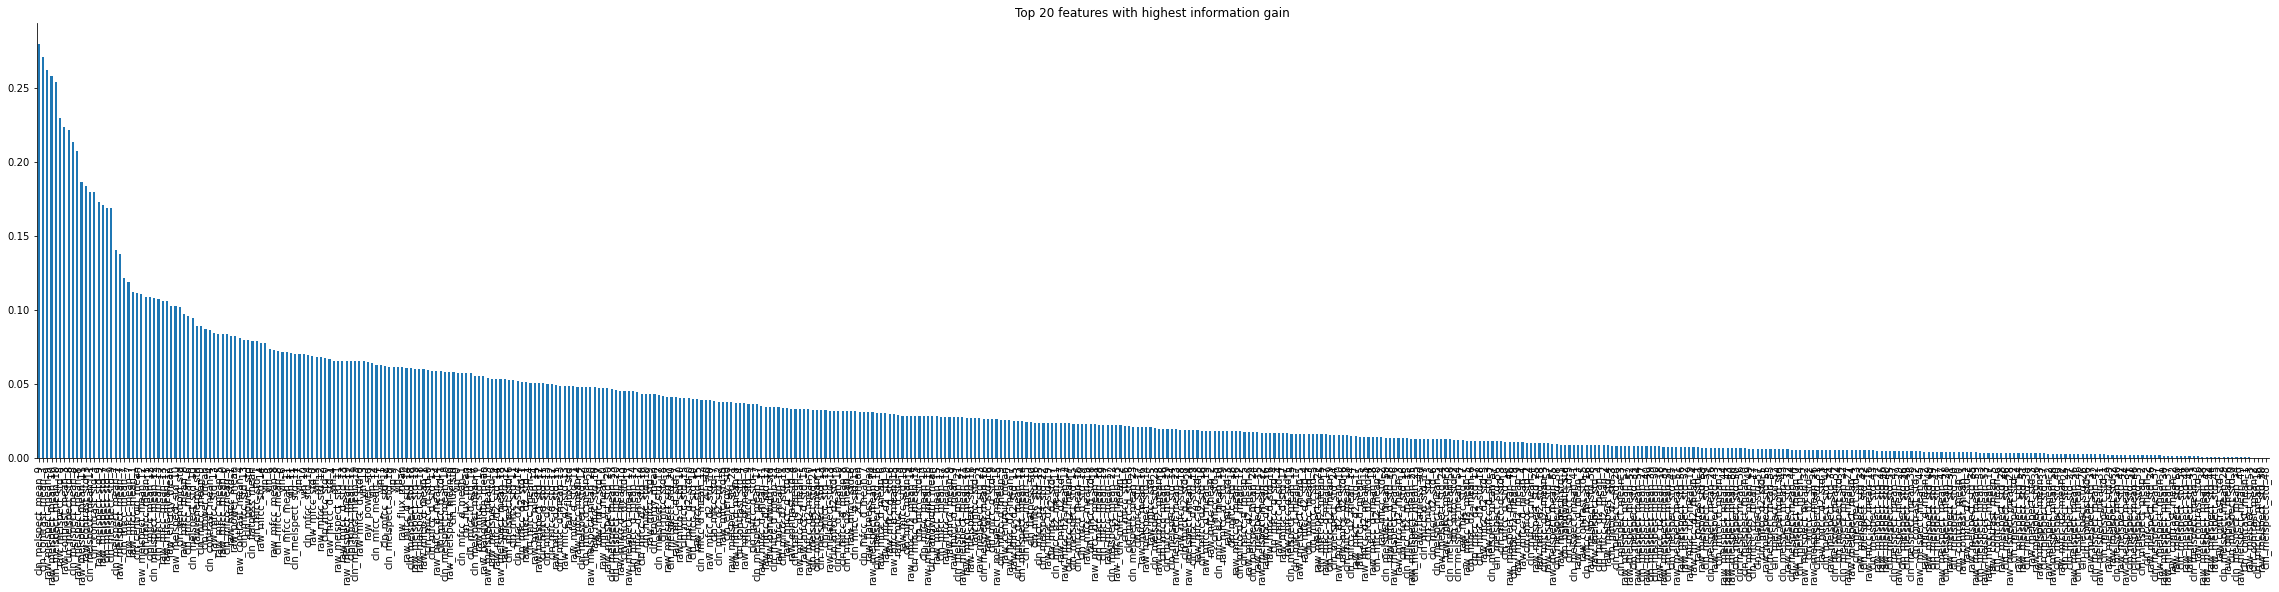

In [225]:
ax = mutual_info_copy.sort_values(ascending=False).plot.bar(figsize=(40, 8))
plt.title('Top 20 features with highest information gain')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

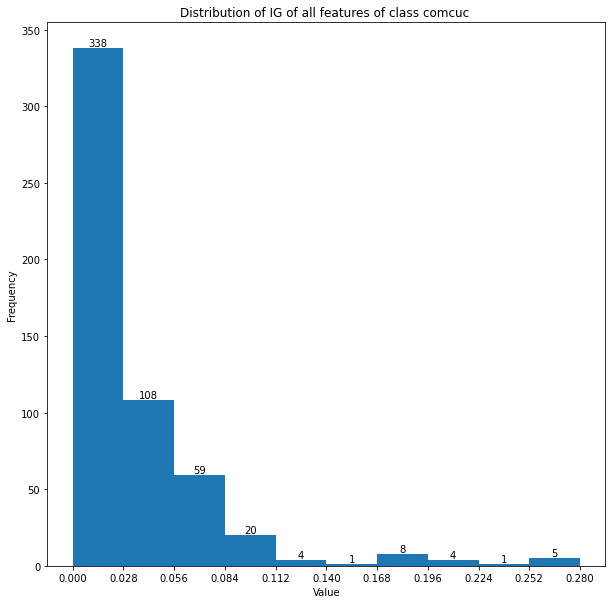

In [250]:
mutual_info_np = mutual_info

fig, ax = plt.subplots(figsize=(10, 10))
n, bins, patches = ax.hist(mutual_info_np, bins=10)

# display the count on top of each rectangle
for i, patch in enumerate(patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.text(x, y, int(n[i]), ha='center', va='bottom')

# set labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of IG of all features of class comcuc ')


# set the x-axis ticks to display the interval of each bin
ax.set_xticks(bins)
#ax.set_xticklabels([f"[{bins[i]:.2f}, {bins[i+1]:.2f})" for i in range(len(bins)-1)])


# display the plot
plt.show()